### General topics in email classification and extraction:
1. Again 30+ languages
2. Diff between Categorization and classification
3. Features to use
4. Different approaches
5. Input segmentation (find the 'real' content esp. in emails
6. email formats: txt, eml, msg
7. Extraction of information, general and specific ones
8. Start loving language problems 😊

<b>Categorization</b> is the process of dividing the world into groups of entities whose members are in some way similar to each other.

<b>Classiﬁcation</b> as a process involves the orderly and systematic assignment of each entity to one and only one class within a system of mutually exclusive and nonoverlapping classes.

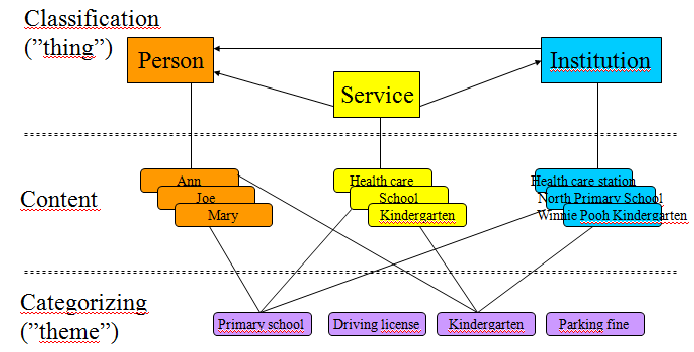

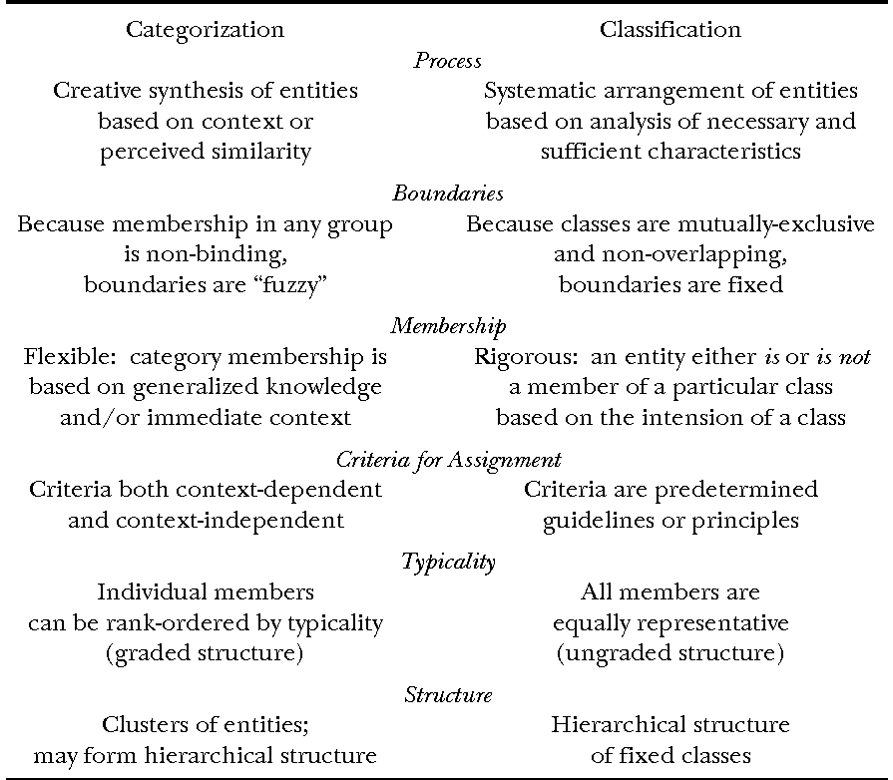

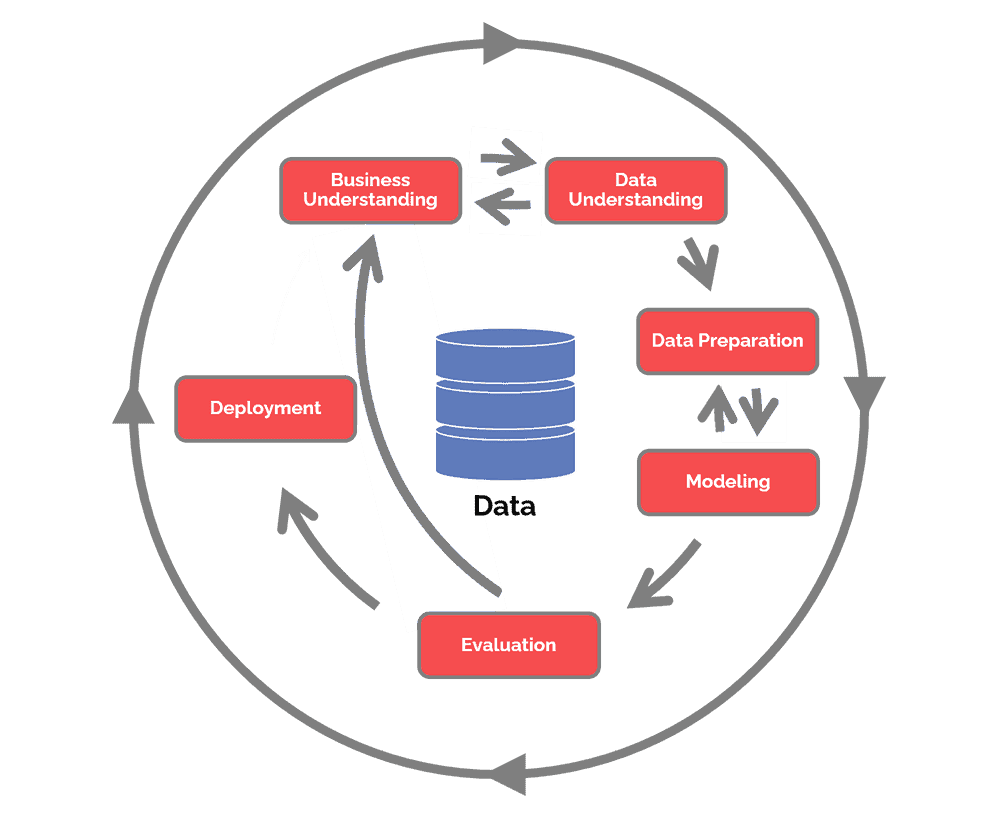

Categories for consideration:
1) Rechnungen 
2) Mahnungen 
3) Vertraege und Vereinbarun 
4) Storno 
5) Aktivierung Sim 
6) Tarife 

In [1]:
import pandas as pd 
import os 

In [3]:
dataset_dir = "emails_short_ds"

for folder_name in os.listdir(dataset_dir):
    print(folder_name)

2900_TARIFE
1000_RECHNUNGEN
1400_MAHNUNGEN
2110_STORNO
2700_AKTIVIERUNG_SIM
2100_VERTRAEGE_UND_VEREINBARUN


In [4]:
# create a dictionary containing info about letters of 6 different categories

email_data = {
    'Category':[],
    'Email':[],
    'Content':[]
}


# function for storing emails to python dictionary 

for folder in os.listdir(dataset_dir):

    clean_folder = folder.split('_')[1]

    fold = os.path.join(dataset_dir, folder)

    for file in os.listdir(fold):
        
        # check if it's a folder
        file_item = os.path.join(fold, file)
        if os.path.isdir(file_item):
            for f in os.listdir(file_item):
                if f.endswith('.TXT'):

                    cont = os.path.join(file_item, f)

                    with open(cont, 'r', encoding='latin-1') as f:
                        cont = f.read()

                    email_data['Category'].append(clean_folder)
                    email_data['Email'].append(str(f))
                    email_data['Content'].append(cont)

        # check if it's a single .txt email
        if file.endswith('.TXT'):
            cont = os.path.join(fold, file)
            with open(cont, 'r', encoding='latin-1') as f:
                cont = f.read()
        
                email_data['Category'].append(clean_folder)
                email_data['Email'].append(str(f))
                email_data['Content'].append(cont)

Structure of the email_data dictionary:
```json
{
    'Category': [...],
    'Email': [...],
    'Content': [...]
}
```

In [12]:
# converting the email_data dictionary to pandas DataFrame 
df = pd.DataFrame(email_data)

In [13]:
print(df['Content'][0])

An:	KUNDENSERVICE@EPLUS
Kopie:	 
Datum:	06.06.2001 08:46:53
Betreff:	E-Mail Beantwortung

	  



Anrede         : Frau
Name           : Sim Karte Gesperrt Thielsch Kai
Handyrufnummer : 49 178 8820181
Account Nummer :
Handymodell    : 6150
Provider       : E-Plus Service
Email          : kaithielsch@gmx.de
-------------------------------------
Nachricht      : Liebes e plus Team
Ich habe aus versehen meinen Pin und den darauffolgenden "puk" falsch 
eingegeben
Nun ist meine sim karte gesperrt
Wie kann ich einen neuen Pin bekommen damit mein handy wieder 
einsatzbereit ist??

Vielen dank im vorraus
Mit freundlichen grüßen
Kai Thielsch
-------------------------------------
--444043493.991813613145.JavaMail.nsuser@apps3mn1--




In [16]:
df.Content[0]

'An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t06.06.2001 08:46:53\nBetreff:\tE-Mail Beantwortung\n\n\t  \n\n\n\nAnrede         : Frau\nName           : Sim Karte Gesperrt Thielsch Kai\nHandyrufnummer : 49 178 8820181\nAccount Nummer :\nHandymodell    : 6150\nProvider       : E-Plus Service\nEmail          : kaithielsch@gmx.de\n-------------------------------------\nNachricht      : Liebes e plus Team\nIch habe aus versehen meinen Pin und den darauffolgenden "puk" falsch \neingegeben\nNun ist meine sim karte gesperrt\nWie kann ich einen neuen Pin bekommen damit mein handy wieder \neinsatzbereit ist??\n\nVielen dank im vorraus\nMit freundlichen grüßen\nKai Thielsch\n-------------------------------------\n--444043493.991813613145.JavaMail.nsuser@apps3mn1--\n\n'

In [14]:
# shuffle the dataframe to avoid sample selection bias 
shuffled_df = df.sample(frac=1)

In [15]:
shuffled_df.head()

,Category,Email,Content
55,TARIFE,<_io.TextIOWrapper name='emails_short_ds/2900_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
183,MAHNUNGEN,<_io.TextIOWrapper name='emails_short_ds/1400_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...
231,AKTIVIERUNG,<_io.TextIOWrapper name='emails_short_ds/2700_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...
345,VERTRAEGE,<_io.TextIOWrapper name='emails_short_ds/2100_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...
273,VERTRAEGE,<_io.TextIOWrapper name='emails_short_ds/2100_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...


In [18]:
# checking for Null values
shuffled_df.isna().any()

Category    False
Email       False
Content     False
dtype: bool

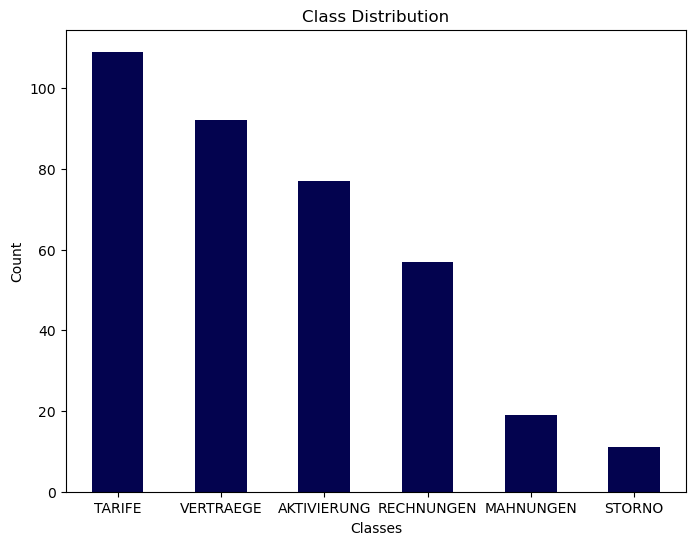

In [19]:
import matplotlib.pyplot as plt 

# Count the occurrences of each class
class_counts = df['Category'].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=(0.01,0.01,0.31))
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

We obviously deal with the dataset imbalance, and possibke soultions are over- and undersampling, but as for now we ignore the fact.

In [20]:
# function to fetch the email body 
def fetch_body(text):

    my_text = text.split('Nachricht      : ')[-1]

    text =  my_text.split('--')[0]

    return text.replace('\n', ' ')

shuffled_df['Email_body'] = shuffled_df['Content'].apply(fetch_body)

In [21]:
sentence_example = shuffled_df['Email_body'][0]
print(sentence_example)

Liebes e plus Team Ich habe aus versehen meinen Pin und den darauffolgenden "puk" falsch  eingegeben Nun ist meine sim karte gesperrt Wie kann ich einen neuen Pin bekommen damit mein handy wieder  einsatzbereit ist??  Vielen dank im vorraus Mit freundlichen grüßen Kai Thielsch 


### Functions for text cleaning

In [24]:
from cleantext import clean 

sent = clean(sentence_example,
    fix_unicode=True,
    to_ascii=True,
    lower=True,
    no_line_breaks=True,
    no_urls=True,
    no_emails=True,
    no_phone_numbers=True,
    no_numbers=True,
    no_digits=True,
    no_punct=True,
    no_currency_symbols=True,
    replace_with_punct="",          # instead of removing punctuations you may replace them
    replace_with_url="",
    replace_with_email="",
    replace_with_phone_number="",
    replace_with_number="",
    replace_with_digit="",
    replace_with_currency_symbol="",
    lang="de"     
    )

In [25]:
sentence_example.replace('\n', '')

'Liebes e plus Team Ich habe aus versehen meinen Pin und den darauffolgenden "puk" falsch  eingegeben Nun ist meine sim karte gesperrt Wie kann ich einen neuen Pin bekommen damit mein handy wieder  einsatzbereit ist??  Vielen dank im vorraus Mit freundlichen grüßen Kai Thielsch '

In [26]:
print(sent)

liebes e plus team ich habe aus versehen meinen pin und den darauffolgenden puk falsch eingegeben nun ist meine sim karte gesperrt wie kann ich einen neuen pin bekommen damit mein handy wieder einsatzbereit ist vielen dank im vorraus mit freundlichen grüßen kai thielsch


In [27]:
import spacy

de_nlp = spacy.load("de_core_news_sm")

def clean_text(text):

    cleaned_text = clean(text)

    doc = de_nlp(cleaned_text)

    # lemmatize filtered non-stopwords
    no_stopwords_sent = [str(word.lemma_).lower() for word in doc if not word.is_stop]

    return ' '.join(no_stopwords_sent)

clean_text(sent)


'liebes e plus team versehen pin darauffolgend puk falsch eingegeben sim karte sperren pin bekommen handy einsatzbereit vorraus freundlich grussen köien thielsch'

In [28]:
sent

'liebes e plus team ich habe aus versehen meinen pin und den darauffolgenden puk falsch eingegeben nun ist meine sim karte gesperrt wie kann ich einen neuen pin bekommen damit mein handy wieder einsatzbereit ist vielen dank im vorraus mit freundlichen grüßen kai thielsch'

In [29]:
# add column with cleaned texts 
shuffled_df['Clean_text'] = shuffled_df['Email_body'].apply(clean_text)

In [30]:
shuffled_df['Clean_text']

55     sms time & more tarif abrechnen -- mfg jorg bu...
183    geehrt dam herr -- 2 monaten rechnung zuruckge...
231    hallo -- gehort -- mann eplus handynummer auss...
345    geehrt dam herr -- 21.12.99 tangenskunde(=mind...
273    geehrt dam herr -- alt handy -- nokia 6130 -- ...
                             ...                        
172    -- kundenservice@eplus kopie -- datum -- 29.06...
268    reichen -- 03.07.2001 -- vertrag abschließen 1...
84     geehrt dam herren -- e-plus kunde kundenservic...
14     geehrt dam herr -- siemens-mitarbeiter uber fi...
333    letzter nachfrage bezuglich twin-card mitteile...
Name: Clean_text, Length: 365, dtype: object

In [31]:
import re 

def no_dashes(text):
    return re.sub('--', '', text.replace('\n', ''))

shuffled_df['Clean_text'] = shuffled_df['Clean_text'].apply(no_dashes)

In [32]:
shuffled_df.tail()

,Category,Email,Content,Email_body,Clean_text
172,MAHNUNGEN,<_io.TextIOWrapper name='emails_short_ds/1400_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,An:\tKUNDENSERVICE@EPLUS Kopie:\t Datum:\t29....,kundenservice@eplus kopie datum 29.06.2001 ...
268,AKTIVIERUNG,<_io.TextIOWrapper name='emails_short_ds/2700_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,Mir reicht es jetzt wirklich! Heute ist der 03...,reichen 03.07.2001 vertrag abschließen 12.05...
84,TARIFE,<_io.TextIOWrapper name='emails_short_ds/2900_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Sehr geehrte Damen und Herren, kann ich als e...",geehrt dam herren e-plus kunde kundenservice ...
14,TARIFE,<_io.TextIOWrapper name='emails_short_ds/2900_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Sehr geehrte Damen und Herren, da ich Siemen...",geehrt dam herr siemens-mitarbeiter uber firm...
333,VERTRAEGE,<_io.TextIOWrapper name='emails_short_ds/2100_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,Nach meiner letzten Nachfrage bezüglich einer ...,letzter nachfrage bezuglich twin-card mitteile...


### Define the classifier 

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

shuffled_df['Category_ID'] = label_encoder.fit_transform(shuffled_df['Category'])

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [34]:
shuffled_df.head()

,Category,Email,Content,Email_body,Clean_text,Category_ID
55,TARIFE,<_io.TextIOWrapper name='emails_short_ds/2900_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,Wie werden SMS bei den Time & More Tarifen abg...,sms time & more tarif abrechnen mfg jorg buch...,4
183,MAHNUNGEN,<_io.TextIOWrapper name='emails_short_ds/1400_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t2...,"Sehr geehrte Damen und Herren, bei mir wurde ...",geehrt dam herr 2 monaten rechnung zuruckgebu...,1
231,AKTIVIERUNG,<_io.TextIOWrapper name='emails_short_ds/2700_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t1...,"Hallo ! Ich habe gehört, das mann bei Eplus s...",hallo gehort mann eplus handynummer aussuche...,0
345,VERTRAEGE,<_io.TextIOWrapper name='emails_short_ds/2100_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,"Sehr geehrte Damen und Herren, ich bin seit 21...",geehrt dam herr 21.12.99 tangenskunde(=mindes...,5
273,VERTRAEGE,<_io.TextIOWrapper name='emails_short_ds/2100_...,An:\tKUNDENSERVICE@EPLUS\nKopie:\t \nDatum:\t0...,"Sehr geehrte Damen und Herren, ich möchte mei...",geehrt dam herr alt handy nokia 6130 weiter...,5


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings

warnings.filterwarnings("ignore")

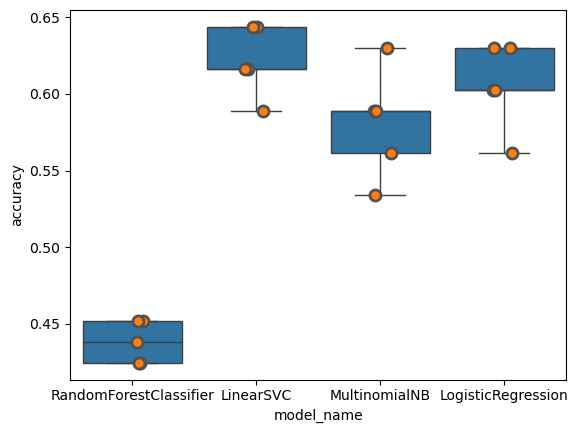

In [36]:
warnings.filterwarnings("ignore")

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2))
features = tfidf.fit_transform(shuffled_df.Clean_text).toarray()
labels = shuffled_df.Category

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [37]:
categories_list = list(shuffled_df['Category'].unique())

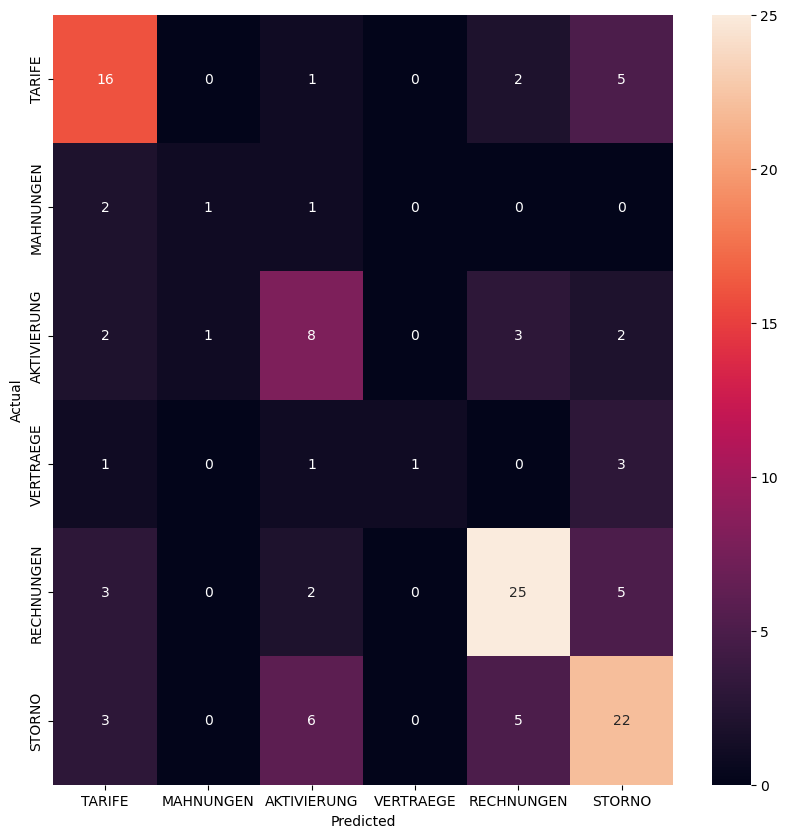

In [38]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, shuffled_df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categories_list, yticklabels=categories_list)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [39]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred, target_names=shuffled_df['Category'].unique()))

              precision    recall  f1-score   support

      TARIFE       0.59      0.67      0.63        24
   MAHNUNGEN       0.50      0.25      0.33         4
 AKTIVIERUNG       0.42      0.50      0.46        16
   VERTRAEGE       1.00      0.17      0.29         6
  RECHNUNGEN       0.71      0.71      0.71        35
      STORNO       0.59      0.61      0.60        36

    accuracy                           0.60       121
   macro avg       0.64      0.48      0.50       121
weighted avg       0.62      0.60      0.60       121



In [40]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.621918
LogisticRegression        0.605479
MultinomialNB             0.580822
RandomForestClassifier    0.438356
Name: accuracy, dtype: float64

Compare with the performance of the model trained on the unpreprocessed text:

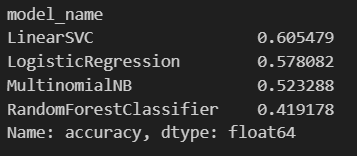

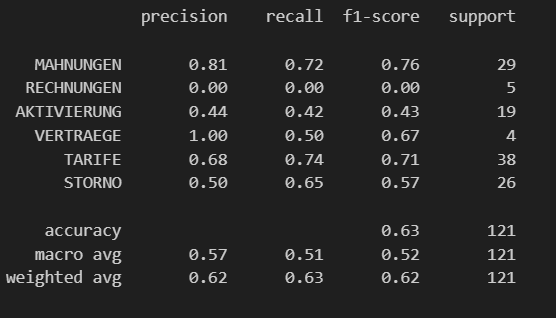

<b>Issues:</b>
1) Imbalanced dataset 
2) Encoding problems:<br>
<em>vielen Dank fьr Ihre schnelle Antwort!!!</em> (must be <em>für</em>)
3) Cleaning method 
4) Small dataset